# Fetching Fear & Greed Data 2023

In [3]:
import requests
## %matplotlib qt

In [4]:
response = requests.get("https://production.dataviz.cnn.io/index/fearandgreed/graphdata/")

In [5]:
print(response.status_code)
#print(response.json())

418


In [6]:
type(response)

requests.models.Response

In [7]:
response

<Response [418]>

In [8]:
print(response.content) # The server blocks the attempt to fetch data

b"I'm a teapot. You're a bot."


The attempt to simply fetch the json file was detected by the server. Therefore we have to pretend to be "another user" which looks like a real user instead of a bot. In order to achieve this,we will import fake_useragent library and use random user from the list.

In [9]:
!pip install fake_useragent
import requests, csv, json, urllib
import pandas as pd
import time
from fake_useragent import UserAgent
import datetime

In [10]:
BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata/"
START_DATE = '2020-09-19' ### you may need to change the dates,Fear and Greed values are not stored indefinitely 
END_DATE = '2023-10-10' ####therefore if it is not working select newer dates
agent = UserAgent()

headers = {
   'User-Agent': agent.random,
   }

response = requests.get(BASE_URL + START_DATE, headers = headers)
data = response.json()

In [11]:
jsonFile = open(r"C:\Users\vilob\OneDrive\Počítač\Projekty\Fear and Greed Scraper\Fear_Greed.json", "w") #choose where to save data
data_json = json.dumps(data)
jsonFile.write(data_json)
jsonFile.close()

If We open the data in a separate JSON viewer (for example https://jsonviewer.stack.hu/#http://) we can see the structure of a JSON, our goal is to select the main components of Fear and Greed Index and structure them in a pandas dataframe.
<div>
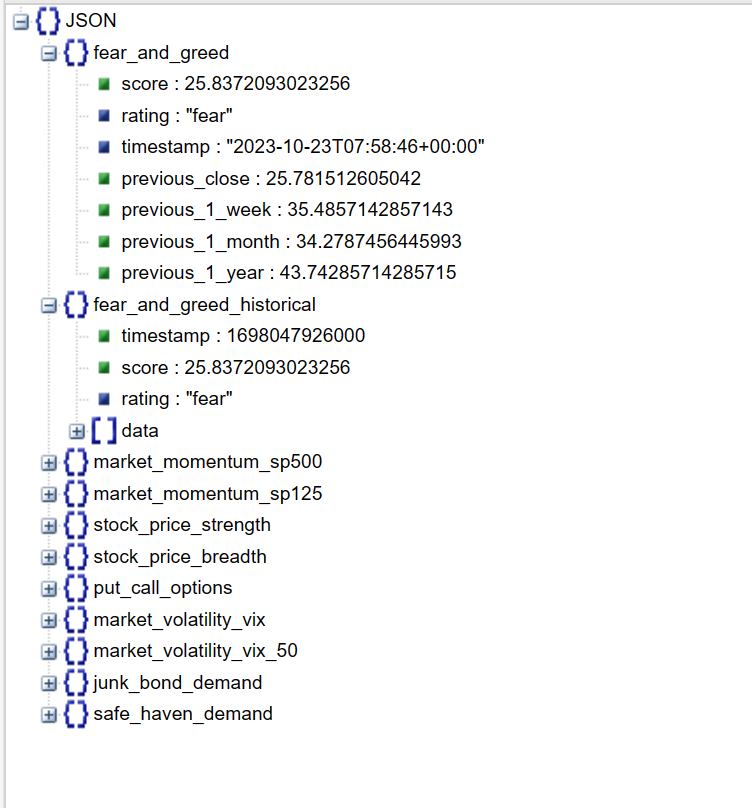
</div>

## Formatting JSON Data

In [12]:
type(data) # data is a dictionary,so we can access its elements accordingly

dict

#### Right now we want to begin with the historical values of Fear and Greed which are stored under "Data" as depicted on the picture
<div>
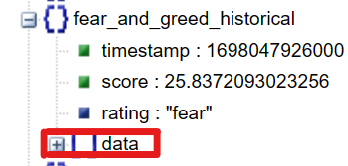
</div>

For the purpose of checking the timestamp conversion, you may use for online UNIX timestamp converters,such as https://www.epochconverter.com/

In [13]:
data["fear_and_greed_historical"]["data"][0]# data consists of x(timestamp),y(FG value) and rating(extreme fear,fear,neutral,gred,extreme greed)

{'x': 1600646400000.0, 'y': 50.0, 'rating': 'neutral'}

In [14]:
len(data["fear_and_greed_historical"]["data"])  #there are 778 entries

791

In [15]:
FG_Historical_Data = pd.DataFrame.from_dict(data["fear_and_greed_historical"]["data"])

In [16]:
FG_Historical_Data

,x,y,rating
0,1.600646e+12,50.000000,neutral
1,1.600733e+12,50.000000,neutral
2,1.600819e+12,50.000000,neutral
3,1.600906e+12,50.000000,neutral
4,1.600992e+12,50.000000,neutral
...,...,...,...
786,1.698970e+12,39.685714,fear
787,1.699229e+12,41.685714,fear
788,1.699315e+12,40.971429,fear
789,1.699402e+12,40.971429,fear


In [17]:
FG_Historical_Data = FG_Historical_Data.rename(columns={"x": "Date", "y": "FG Value"})
for i in range(0,len(FG_Historical_Data["Date"])):
    FG_Historical_Data["Date"][i] = datetime.datetime.fromtimestamp(((FG_Historical_Data["Date"][i])/1000))
    

C:\Users\vilob\AppData\Local\Temp\ipykernel_15004\1056899852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FG_Historical_Data["Date"][i] = datetime.datetime.fromtimestamp(((FG_Historical_Data["Date"][i])/1000))


In [18]:
FG_Historical_Data

,Date,FG Value,rating
0,2020-09-21 02:00:00,50.000000,neutral
1,2020-09-22 02:00:00,50.000000,neutral
2,2020-09-23 02:00:00,50.000000,neutral
3,2020-09-24 02:00:00,50.000000,neutral
4,2020-09-25 02:00:00,50.000000,neutral
...,...,...,...
786,2023-11-03 01:00:00,39.685714,fear
787,2023-11-06 01:00:00,41.685714,fear
788,2023-11-07 01:00:00,40.971429,fear
789,2023-11-08 01:00:00,40.971429,fear


Now we will add the remaining Fear and Greed components to the dataframe

In [19]:
components_names= ["put_call_options","stock_price_strength","stock_price_breadth","market_volatility_vix","market_volatility_vix_50","junk_bond_demand","safe_haven_demand","market_momentum_sp500","market_momentum_sp125"]
for name in components_names:
    copied_columns = pd.DataFrame.from_dict(data[name]["data"])
    FG_Historical_Data[name] = copied_columns["y"]

In [20]:
FG_Historical_Data

,Date,FG Value,rating,put_call_options,stock_price_strength,stock_price_breadth,market_volatility_vix,market_volatility_vix_50,junk_bond_demand,safe_haven_demand,market_momentum_sp500,market_momentum_sp125
0,2020-09-21 02:00:00,50.000000,neutral,0.671277,2.109695,1003.024020,27.78,25.2862,2.109300,-4.250120,3281.06,3095.01144
1,2020-09-22 02:00:00,50.000000,neutral,0.681688,1.956149,953.320319,26.86,25.1796,2.140200,-3.841668,3315.57,3101.73152
2,2020-09-23 02:00:00,50.000000,neutral,0.704004,1.774949,869.614184,28.58,25.1608,2.154800,-7.489870,3236.92,3106.58632
3,2020-09-24 02:00:00,50.000000,neutral,0.726122,1.526890,805.837768,28.51,25.1758,2.156700,-7.853679,3246.59,3112.22728
4,2020-09-25 02:00:00,50.000000,neutral,0.725698,1.315211,767.758908,26.38,25.1434,2.177200,-6.860792,3298.46,3117.60176
...,...,...,...,...,...,...,...,...,...,...,...,...
786,2023-11-03 01:00:00,39.685714,fear,0.948695,-6.320525,314.165014,14.91,16.8090,1.736731,0.106996,4358.34,4363.66648
787,2023-11-06 01:00:00,41.685714,fear,0.933754,-6.158268,363.014331,14.89,16.7932,1.738354,0.201238,4365.98,4365.64096
788,2023-11-07 01:00:00,40.971429,fear,0.922757,-6.207836,394.015167,14.81,16.7878,1.771240,0.052188,4378.38,4367.56688
789,2023-11-08 01:00:00,40.971429,fear,0.922757,-6.211294,409.600547,14.74,16.7936,1.771240,0.052188,4378.38,4367.56688


In [21]:
FG_Historical_Data.to_csv(r"C:\Users\vilob\OneDrive\Počítač\Projekty\Fear and Greed Scraper\FG_Data.csv")

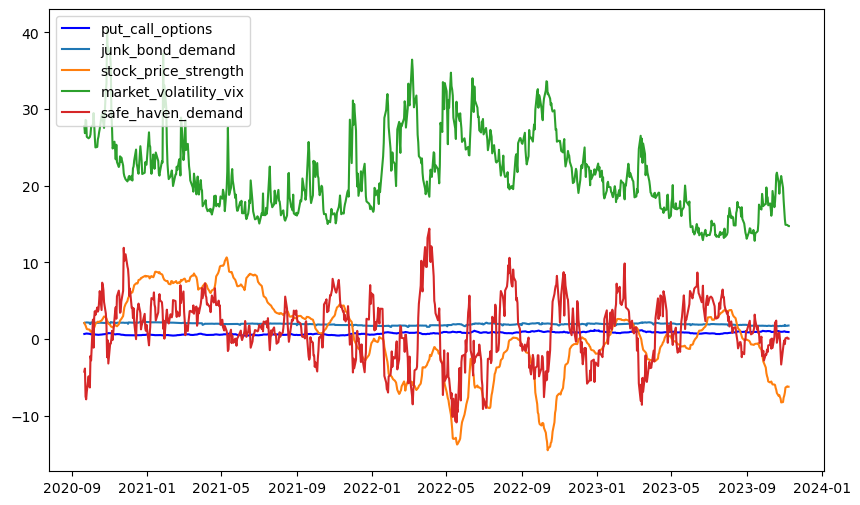

In [22]:
##### Lets plot the data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( FG_Historical_Data["Date"],FG_Historical_Data["put_call_options"],"-b", label = "put_call_options")
plt.plot( FG_Historical_Data["Date"],FG_Historical_Data["junk_bond_demand"],label = "junk_bond_demand" )
plt.plot( FG_Historical_Data["Date"],FG_Historical_Data["stock_price_strength"],label ="stock_price_strength" )
plt.plot( FG_Historical_Data["Date"],FG_Historical_Data["market_volatility_vix"],label = "market_volatility_vix")
plt.plot( FG_Historical_Data["Date"],FG_Historical_Data["safe_haven_demand"],label = "safe_haven_demand")
plt.legend(loc="upper left")
plt.show()

In [23]:
# in order to display the data in the same range,we have to normalize them

normalized_sps=(FG_Historical_Data["stock_price_strength"]-FG_Historical_Data["stock_price_strength"].min())/(FG_Historical_Data["stock_price_strength"].max()-FG_Historical_Data["stock_price_strength"].min())
normalized_shd=(FG_Historical_Data["safe_haven_demand"]-FG_Historical_Data["safe_haven_demand"].min())/(FG_Historical_Data["safe_haven_demand"].max()-FG_Historical_Data["safe_haven_demand"].min())
normalized_mvv=(FG_Historical_Data["market_volatility_vix"]-FG_Historical_Data["market_volatility_vix"].min())/(FG_Historical_Data["market_volatility_vix"].max()-FG_Historical_Data["market_volatility_vix"].min())
normalized_jbd=(FG_Historical_Data["junk_bond_demand"]-FG_Historical_Data["junk_bond_demand"].min())/(FG_Historical_Data["junk_bond_demand"].max()-FG_Historical_Data["junk_bond_demand"].min())
normalized_pco=(FG_Historical_Data["put_call_options"]-FG_Historical_Data["put_call_options"].min())/(FG_Historical_Data["put_call_options"].max()-FG_Historical_Data["put_call_options"].min())


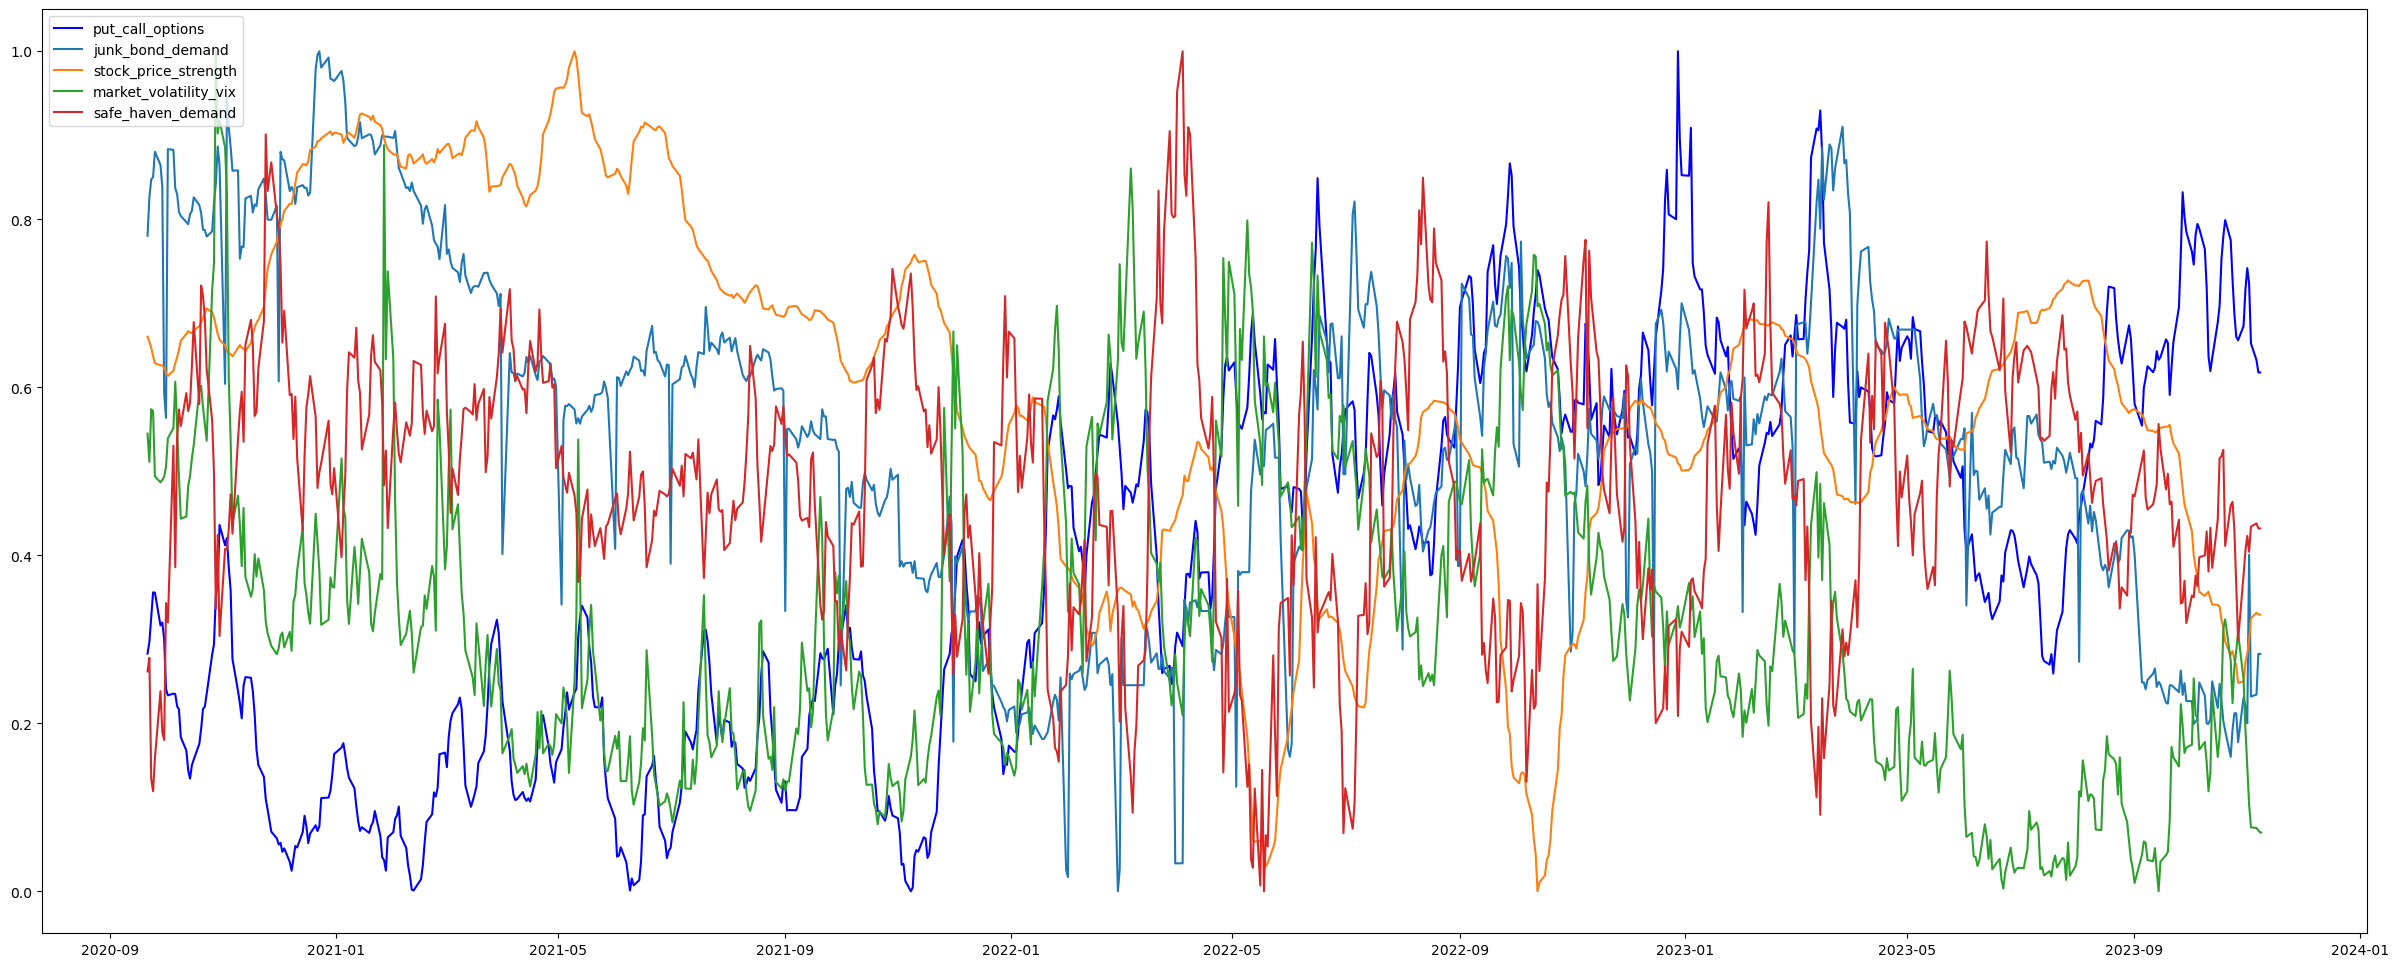

In [24]:
##### Lets plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(30,12))


plt.plot( FG_Historical_Data["Date"],normalized_pco,"-b", label = "put_call_options")
plt.plot( FG_Historical_Data["Date"],normalized_jbd,label = "junk_bond_demand" )
plt.plot( FG_Historical_Data["Date"],normalized_sps,label ="stock_price_strength" )
plt.plot( FG_Historical_Data["Date"],normalized_mvv,label = "market_volatility_vix")
plt.plot( FG_Historical_Data["Date"],normalized_shd,label = "safe_haven_demand")
plt.legend(loc="upper left")
plt.show()


In [25]:
#### Little bit too messy. We will take a S&P 500 values from the same time period and display it in comparison with the FG constituent values

In [26]:
START_DATE = FG_Historical_Data['Date'][0]
END_DATE = FG_Historical_Data['Date'][len(FG_Historical_Data)-1]

In [27]:
import yfinance as yf
SP_500 = yf.download('^GSPC', start=START_DATE, end=END_DATE)

[*********************100%%**********************]  1 of 1 completed


In [28]:
SP_500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,3285.570068,3285.570068,3229.100098,3281.060059,3281.060059,4836070000
2020-09-22,3295.750000,3320.310059,3270.949951,3315.570068,3315.570068,3974510000
2020-09-23,3320.110107,3323.350098,3232.570068,3236.919922,3236.919922,4378650000
2020-09-24,3226.139893,3278.699951,3209.449951,3246.590088,3246.590088,4601920000
2020-09-25,3236.659912,3306.879883,3228.439941,3298.459961,3298.459961,3803330000
...,...,...,...,...,...,...
2023-11-01,4201.270020,4245.640137,4197.740234,4237.859863,4237.859863,4224900000
2023-11-02,4268.259766,4319.720215,4268.259766,4317.779785,4317.779785,4669780000
2023-11-03,4334.229980,4373.620117,4334.229980,4358.339844,4358.339844,4570960000


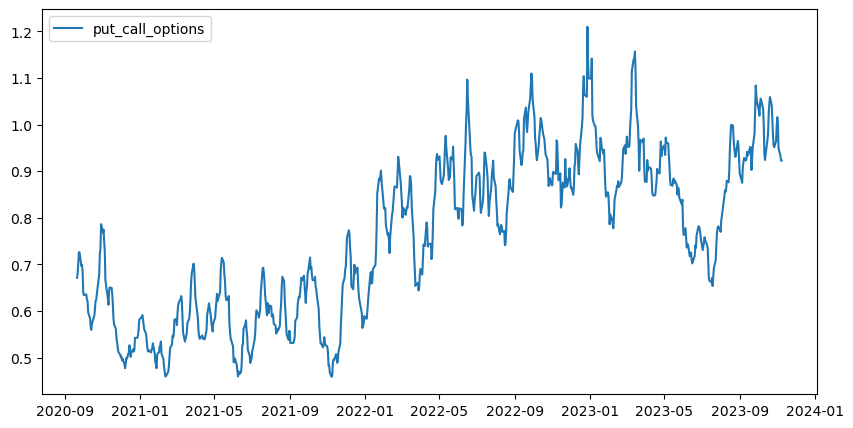

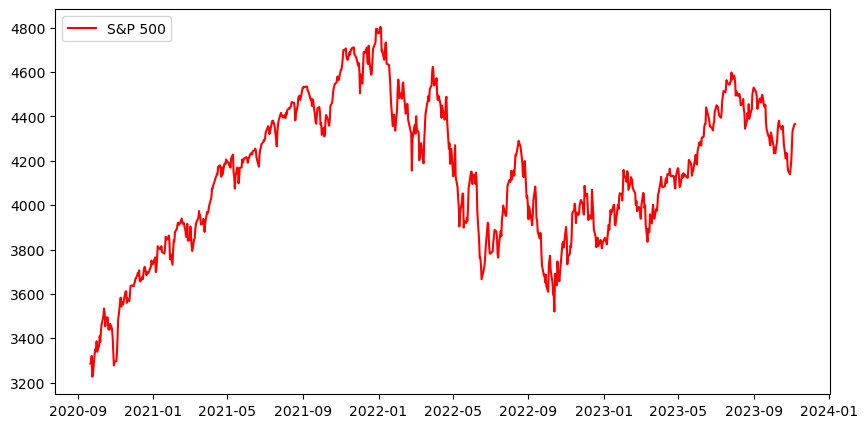

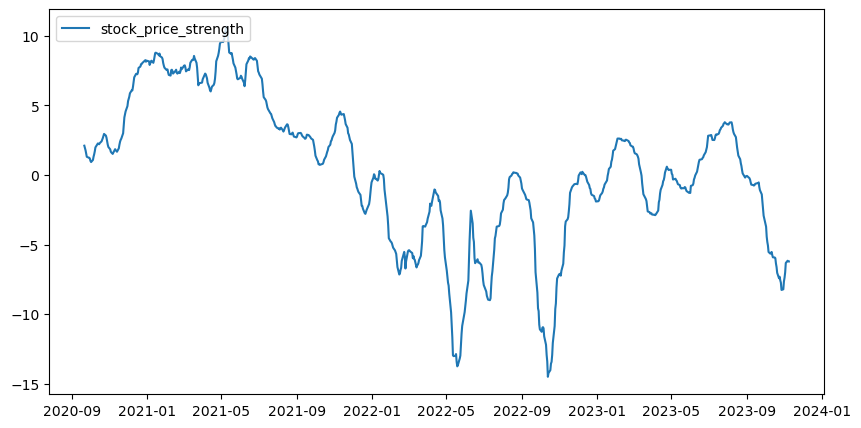

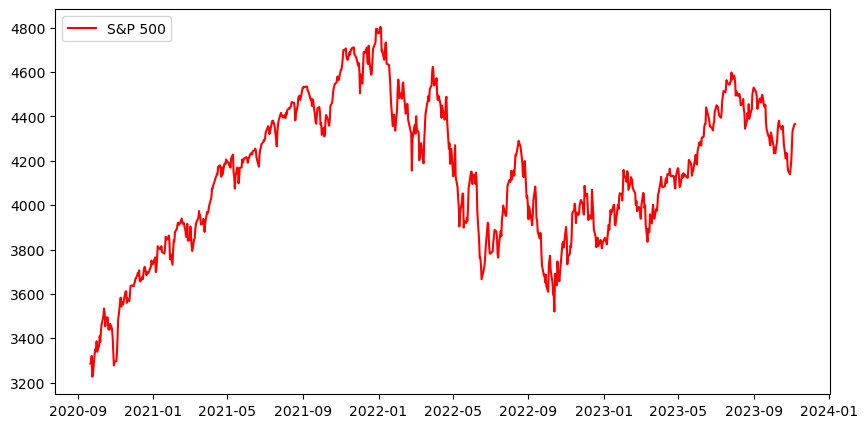

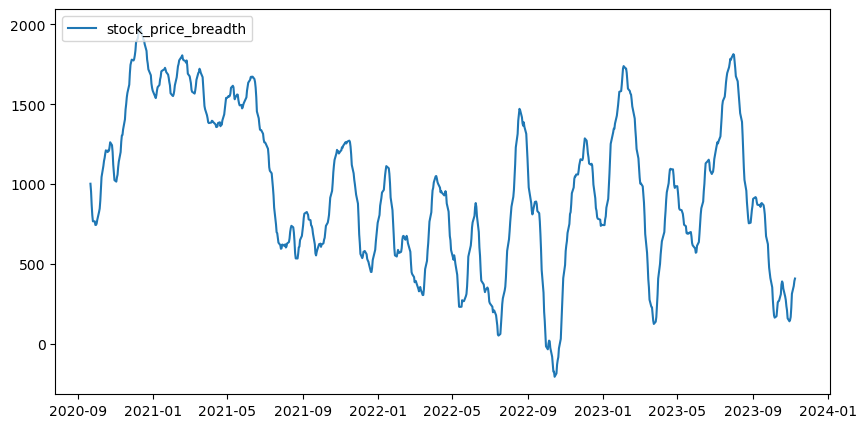

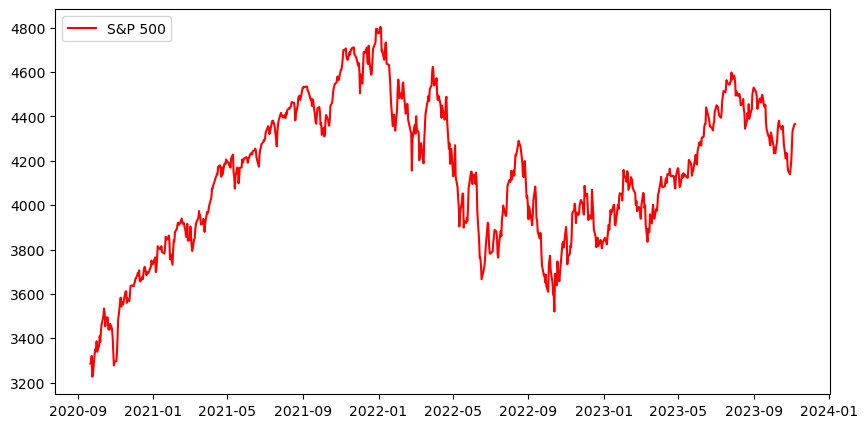

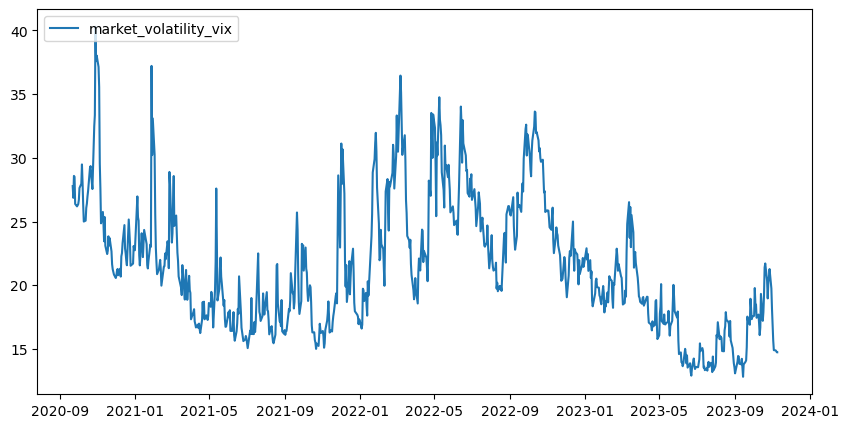

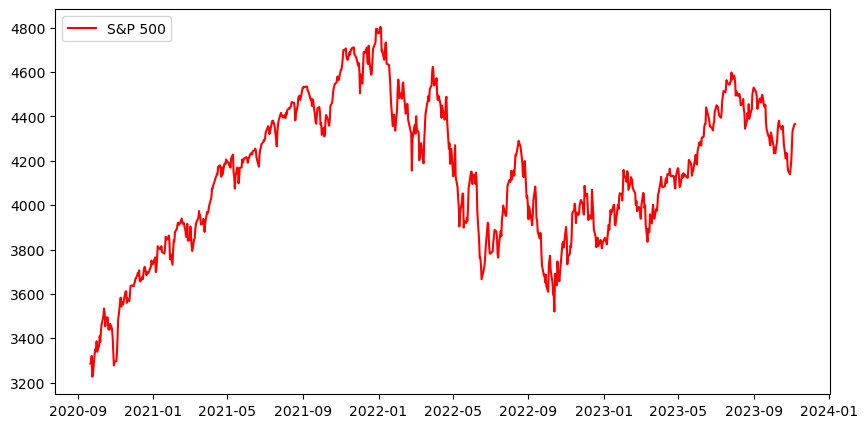

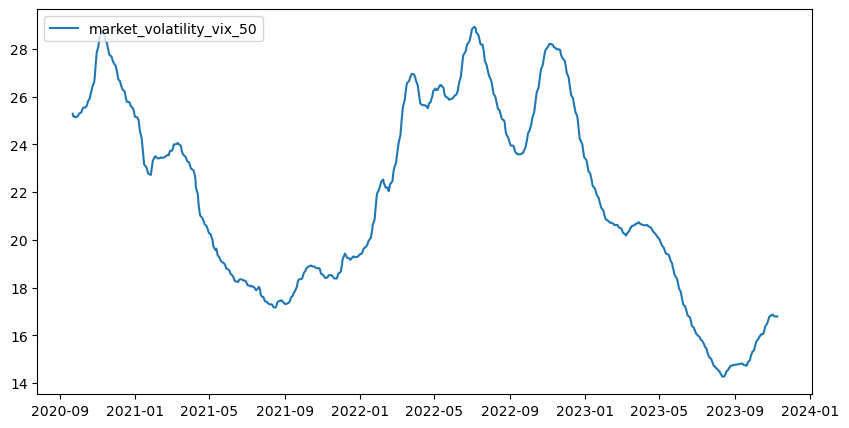

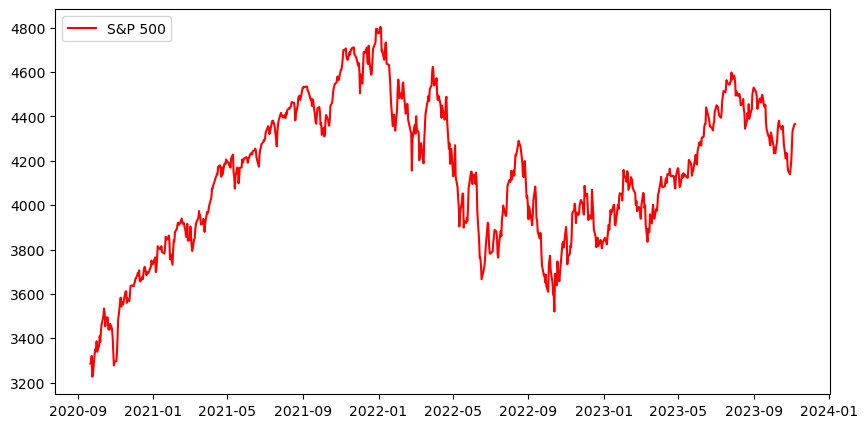

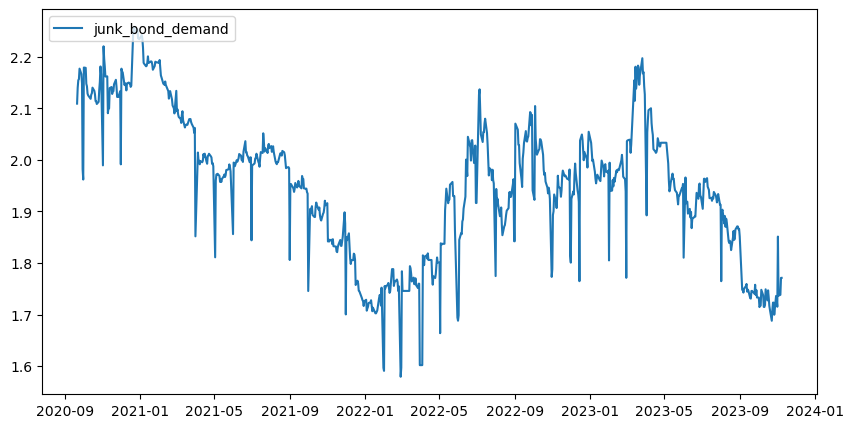

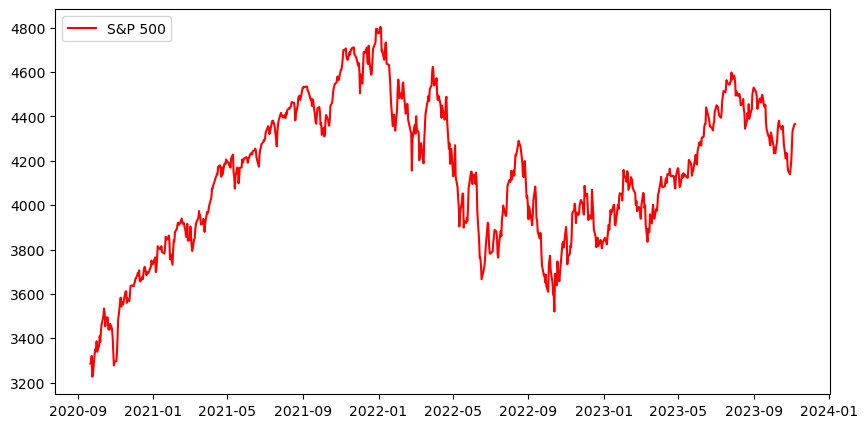

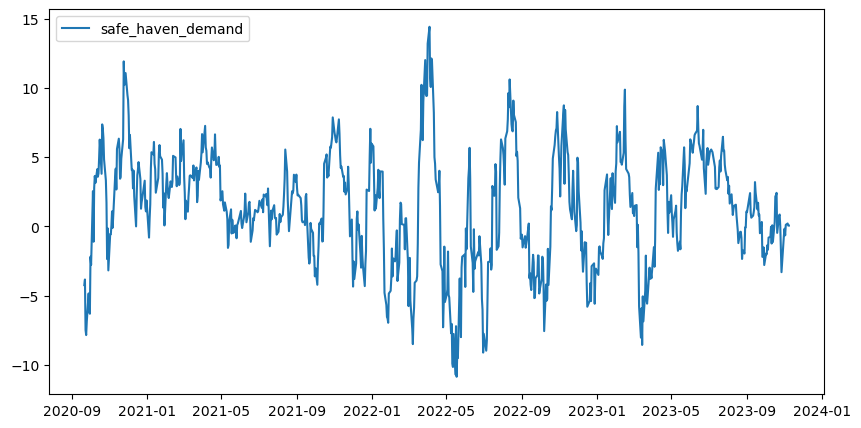

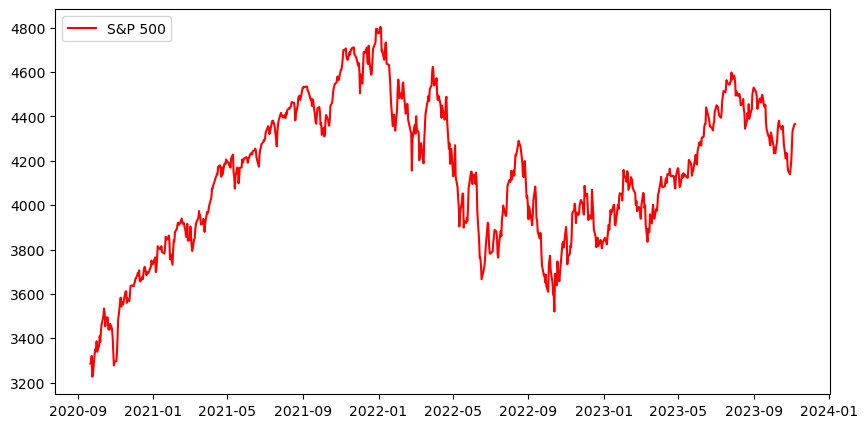

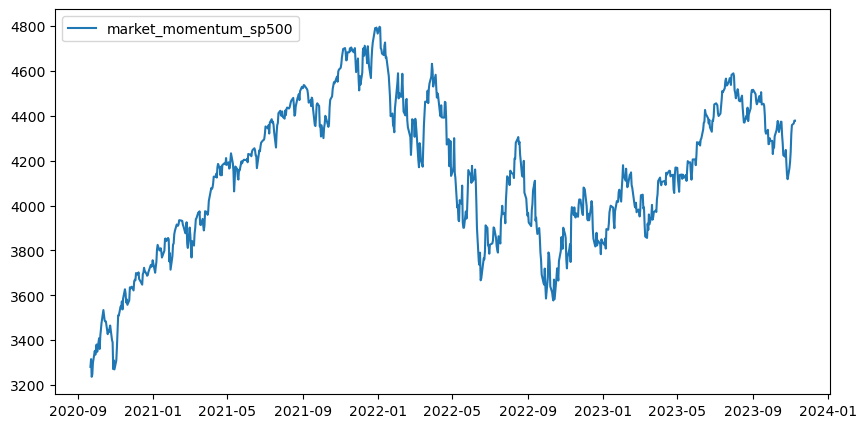

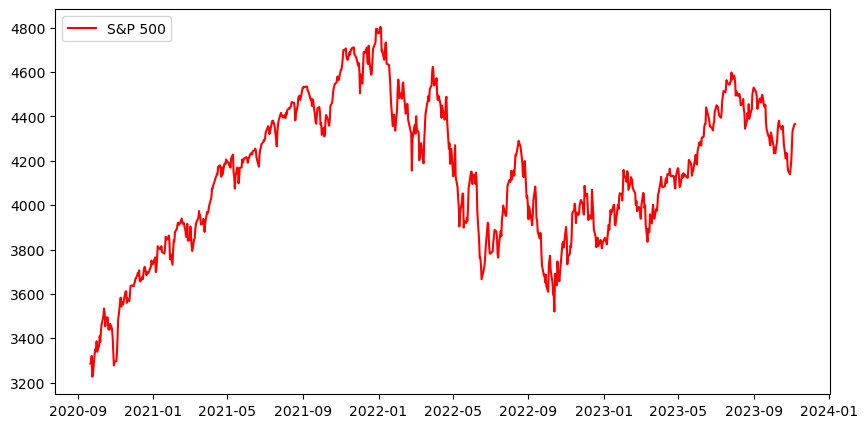

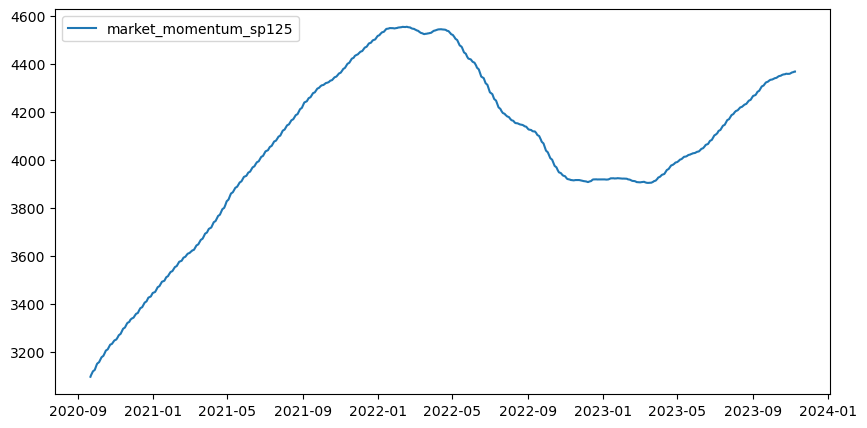

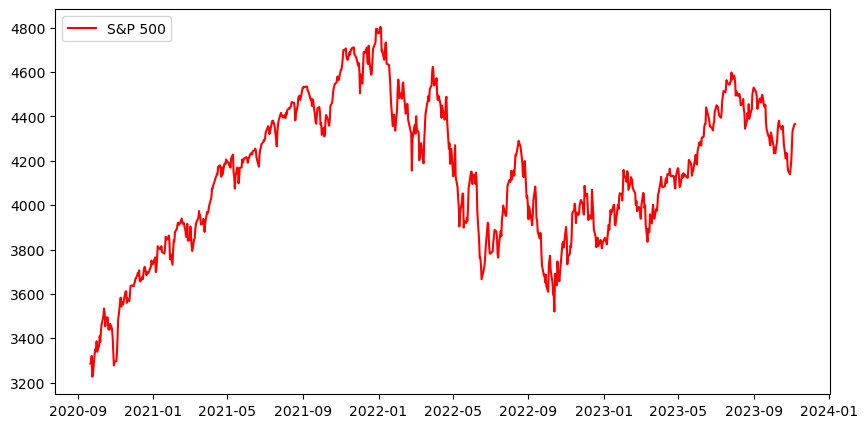

In [30]:
components_names= ["put_call_options","stock_price_strength","stock_price_breadth","market_volatility_vix","market_volatility_vix_50","junk_bond_demand","safe_haven_demand","market_momentum_sp500","market_momentum_sp125"]
for name in components_names : 
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    data_FG = FG_Historical_Data[name]
    plt.plot( FG_Historical_Data["Date"], FG_Historical_Data[name],label = name )
    plt.legend(loc="upper left")
    plt.show()
    
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    plt.plot(SP_500['Open'],label = "S&P 500",color='red')
    plt.legend(loc="upper left")
    plt.show()